In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/X_train.csv')
df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,208500,0.235294,0.75,0.150685,0.033420,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,181500,0.000000,0.75,0.202055,0.038795,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,223500,0.235294,0.75,0.160959,0.046507,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,140000,0.294118,0.75,0.133562,0.038561,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,250000,0.235294,0.75,0.215753,0.060576,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [ ]:
df.shape
df.drop('Id',axis=1, inplace=True)
df.shape

(1460, 83)

In [ ]:
df.isnull().sum()

SalePrice         0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
                 ..
SaleType          0
SaleCondition     0
LotFrontagenan    0
MasVnrAreanan     0
GarageYrBltnan    0
Length: 83, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df) #Getting dummies for categorical values
df.shape

(1460, 83)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'SalePrice'], df['SalePrice'], test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
obj.fit_transform(X_train)
obj.transform(X_test)

array([[-0.87122795,  0.35924596, -0.00613001, ..., -0.47271946,
        -0.06055048, -0.23649645],
       [ 0.06762761,  0.35924596,  1.22227598, ..., -0.47271946,
        -0.06055048, -0.23649645],
       [-0.63651406, -2.20345321, -0.620333  , ..., -0.47271946,
        -0.06055048, -0.23649645],
       ...,
       [ 0.06762761,  0.35924596, -0.05000165, ...,  2.11541958,
        -0.06055048, -0.23649645],
       [ 0.06762761,  0.35924596, -0.05000165, ...,  2.11541958,
        -0.06055048, -0.23649645],
       [-0.87122795,  0.35924596,  0.03774163, ..., -0.47271946,
        -0.06055048, -0.23649645]])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8511989163176158

In [ ]:
from sklearn.decomposition import PCA
for i in range(1,X_train.shape[1]):
      pca = PCA(n_components=i)
      X_train1 = pca.fit_transform(X_train)
      X_test1 = pca.transform(X_test)
      lr = LinearRegression()
      lr.fit(X_train1,y_train)
      y_pred = lr.predict(X_test1)
      print(r2_score(y_test,y_pred))

0.5763708288329722
0.598889470611
0.6226137237585738
0.6237606803370409
0.7008177860703304
0.7024703152302563
0.7067787716630826
0.7188775672330592
0.7328347550376506
0.7331916120033976
0.735220009766802
0.7384671576192465
0.7414065481850953
0.7487263791912928
0.748957915162289
0.7641348045440952
0.7613891343072092
0.7842889257669312
0.7898052127903716
0.7881928114244505
0.7912973299650748
0.795127328873538
0.7960243329295925
0.8001078438321065
0.7984113007729986
0.7989173874168601
0.799004205837706
0.7988839360338034
0.806027472106799
0.8061953613547636
0.819342067885242
0.8190939523921493
0.8178554766668668
0.821011025620247
0.8261197735805677
0.8264822585664714
0.8269810147868356
0.8255183277854015
0.8247479418071955
0.826725386762912
0.8250741095209456
0.8307248396294984
0.8307062156161141
0.8316268042671552
0.832058088490169
0.8317040309843403
0.8337995618014032
0.8343539838668252
0.8346309783791358
0.8345093461959574
0.8350298233347065
0.8346179414441545
0.8347528829520674
0.8347

In [ ]:
pca.explained_variance_

array([7.27198703e-01, 2.22385062e-01, 1.81518187e-01, 1.51188208e-01,
       1.41657603e-01, 1.16699954e-01, 1.12199545e-01, 1.01094964e-01,
       9.10300844e-02, 8.46570634e-02, 7.65491056e-02, 7.44772992e-02,
       6.91521750e-02, 6.20587529e-02, 5.90076775e-02, 5.13025177e-02,
       4.96842818e-02, 4.73575030e-02, 4.48402148e-02, 4.37491046e-02,
       4.10650544e-02, 3.94535625e-02, 3.87995567e-02, 3.70088979e-02,
       3.52076837e-02, 3.43059090e-02, 3.33596619e-02, 3.14029567e-02,
       2.90405945e-02, 2.84631098e-02, 2.67819174e-02, 2.59531391e-02,
       2.39381860e-02, 2.35037178e-02, 2.25080361e-02, 1.97993776e-02,
       1.95905407e-02, 1.78862572e-02, 1.69234863e-02, 1.59864385e-02,
       1.44844804e-02, 1.38228662e-02, 1.35143575e-02, 1.31343675e-02,
       1.25200474e-02, 1.20154805e-02, 1.13263448e-02, 1.09303094e-02,
       1.06490783e-02, 1.02708640e-02, 9.58381326e-03, 9.38221314e-03,
       8.78458779e-03, 8.57048298e-03, 8.27277933e-03, 7.75530798e-03,
      

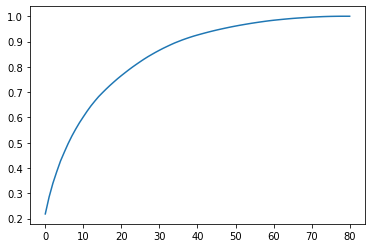

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
pca =PCA(n_components=50)
X_train1 =pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
lr.fit(X_train1,y_train)
y_pred = lr.predict(X_test1)
r2_score(y_test,y_pred)

0.8341044297336766

In [ ]:
#Sorting the values of the first principal component by how large each one is
df_pca = pd.DataFrame({'PCA':pca.components_[0], 'Variable Names':list(X_train.columns)})
df_pca = df_pca.sort_values('PCA', ascending=False)

# #Sorting the absolute values of the first principal component by magnitude
# df2_pca = pd.DataFrame(df_pca)
# df2_pca['PCA']=df2_pca['PCA'].apply(np.absolute)
# df2_pca = df2_pca.sort_values('PCA', ascending=False)
# #print(df2['Variable Names'][0:11])
df_pca.head()

,PCA,Variable Names
19,0.294607,YearRemodAdd
18,0.222281,YearBuilt
58,0.192689,GarageYrBlt
81,0.096885,GarageYrBltnan
67,0.035662,EnclosedPorch


In [ ]:
#Creating Price Categories for PCA Visualization!! We may want to use
#this in training classification models as well
def what_bracket(sale_price):
  if sale_price <=100000:
    return "Tier 1"
  elif sale_price <=200000:
    return "Tier 2"
  elif sale_price <=300000:
    return "Tier 3"
  elif sale_price <= 500000:
    return "Tier 4"
  else:
    return "Tier 5"

y_tiers = y_train.apply(what_bracket)

In [ ]:
pca = PCA(n_components=None)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)

In [ ]:
import plotly.express as px
y_train_trf = y_tiers.astype(str)
fig = px.scatter_3d(x=X_train1[:,0],
                 y=X_train1[:,1],
                 z=X_train1[:,2],
                 color = y_train_trf,
                 color_discrete_sequence = px.colors.qualitative.G10)
fig.show()